In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import pandas as pd

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
housing = fetch_california_housing()

In [22]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [20]:
X_train_full.shape

(15480, 8)

In [21]:
X_test.shape

(5160, 8)

In [23]:
df_train = pd.DataFrame(X_train, columns=housing.feature_names)

In [24]:
df_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(10, activation="relu"), 
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=5e-3), metrics=["mse"])

In [117]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=5e-3))

In [118]:
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.1800 - val_loss: 5.2209
Epoch 2/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6724 - val_loss: 9.7906
Epoch 3/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5629 - val_loss: 5.9972
Epoch 4/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5017 - val_loss: 1.3004
Epoch 5/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4632 - val_loss: 0.3940
Epoch 6/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4472 - val_loss: 0.3981
Epoch 7/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4387 - val_loss: 0.3932
Epoch 8/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4321 - val_loss: 0.3873
Epoch 9/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4265 - val_loss: 0.3837
Epoch 10/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4214 - val_loss: 0.3796
Epoch 11/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4168 - val_loss: 0.3760
Epoch 12/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

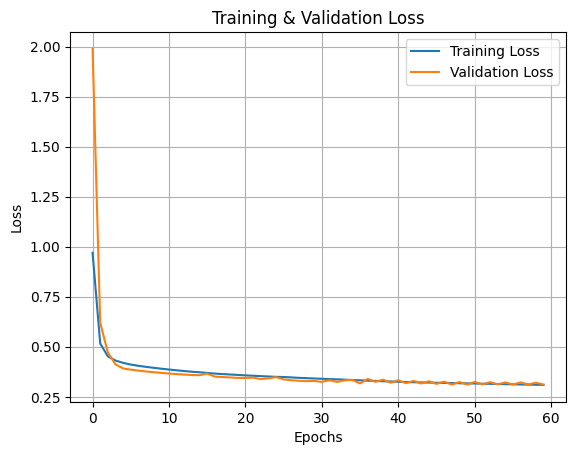

In [113]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.show()

In [114]:
model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3135


0.31221482157707214

In [115]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [116]:
for i in range(len(X_new)):
    print("Sample:", i)
    print("Prediction",y_pred[i][0])
    print("Actual",y_test[i])

Sample: 0
Prediction 0.6489776
Actual 0.477
Sample: 1
Prediction 1.3289877
Actual 0.458
Sample: 2
Prediction 4.465049
Actual 5.00001


In [108]:
y_test[0]

0.477

In [105]:
y_pred[0][0]

0.8487611